In [62]:
import findspark
findspark.init()
findspark.find()

'C:\\Spark'

In [63]:
from pyspark.sql import SparkSession

In [64]:
spark = SparkSession \
 .builder \
 .appName("Python Spark SQL basic example") \
 .config("spark.some.config.option", "some-value") \
 .getOrCreate()

In [65]:
from pyspark.sql import SparkSession 
  
spark = SparkSession.builder.appName("DataFrame").getOrCreate() 
  
Sale_df = spark.read.text(r"B:\mdata\Download\sales.csv.txt") 
  
Sale_df.show()

+--------------------+
|               value|
+--------------------+
|1,A, 2023-01-01,I...|
|2,A, 2022-01-01,I...|
|2,A, 2023-01-07,I...|
|3,A, 2023-01-10,I...|
|3,A, 2022-01-11,I...|
|3,A, 2023-01-11,I...|
|2,B, 2022-02-01,I...|
|2,B, 2023-01-02,I...|
|1,B, 2023-01-04,I...|
|1,B, 2023-02-11,I...|
|3,B, 2023-01-16,I...|
|3,B, 2022-02-01,I...|
|3,C, 2023-01-01,I...|
|1,C, 2023-01-01,U...|
|6,C, 2022-01-07,U...|
|3,D, 2023-02-16,U...|
|5,D, 2022-02-01,U...|
|3,E, 2023-02-01,U...|
|4,E, 2023-02-01,U...|
|4,E, 2023-02-07,U...|
+--------------------+
only showing top 20 rows



**Sale DataFrame**

In [66]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType ,DateType

In [67]:
# Create a spark session using getOrCreate() function 
spark_session = SparkSession.builder.getOrCreate() 
  
# Define the structure for the data frame 
schema = StructType([ 
    StructField("Product_id",IntegerType(),True),
    StructField("customer_id",StringType(),True),
    StructField("order_date",DateType(),True),
    StructField("location",StringType(),True),
    StructField("source_order",StringType(),True),
]) 
  
# Applying custom schema to data frame 
Sale_df = spark_session.read.format( 
    "csv").schema(schema).option( 
    "header", False).load(r"B:\mdata\Download\sales.csv.txt") 
  
# Display the updated schema 
Sale_df.printSchema() 

root
 |-- Product_id: integer (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_date: date (nullable = true)
 |-- location: string (nullable = true)
 |-- source_order: string (nullable = true)



In [68]:
display(Sale_df)

DataFrame[Product_id: int, customer_id: string, order_date: date, location: string, source_order: string]

In [69]:
Sale_df.show()

+----------+-----------+----------+--------+------------+
|Product_id|customer_id|order_date|location|source_order|
+----------+-----------+----------+--------+------------+
|         1|          A|2023-01-01|   India|      Swiggy|
|         2|          A|2022-01-01|   India|      Swiggy|
|         2|          A|2023-01-07|   India|      Swiggy|
|         3|          A|2023-01-10|   India|  Restaurant|
|         3|          A|2022-01-11|   India|      Swiggy|
|         3|          A|2023-01-11|   India|  Restaurant|
|         2|          B|2022-02-01|   India|      Swiggy|
|         2|          B|2023-01-02|   India|      Swiggy|
|         1|          B|2023-01-04|   India|  Restaurant|
|         1|          B|2023-02-11|   India|      Swiggy|
|         3|          B|2023-01-16|   India|      zomato|
|         3|          B|2022-02-01|   India|      zomato|
|         3|          C|2023-01-01|   India|      zomato|
|         1|          C|2023-01-01|      UK|      Swiggy|
|         6|  

In [70]:
#Deriving data from year,Month,Quater

from pyspark.sql. functions import month, year, quarter
Sale_df=Sale_df.withColumn ("order_year", year (Sale_df.order_date))
display(Sale_df)
Sale_df.collect()

DataFrame[Product_id: int, customer_id: string, order_date: date, location: string, source_order: string, order_year: int]

[Row(Product_id=1, customer_id='A', order_date=datetime.date(2023, 1, 1), location='India', source_order='Swiggy', order_year=2023),
 Row(Product_id=2, customer_id='A', order_date=datetime.date(2022, 1, 1), location='India', source_order='Swiggy', order_year=2022),
 Row(Product_id=2, customer_id='A', order_date=datetime.date(2023, 1, 7), location='India', source_order='Swiggy', order_year=2023),
 Row(Product_id=3, customer_id='A', order_date=datetime.date(2023, 1, 10), location='India', source_order='Restaurant', order_year=2023),
 Row(Product_id=3, customer_id='A', order_date=datetime.date(2022, 1, 11), location='India', source_order='Swiggy', order_year=2022),
 Row(Product_id=3, customer_id='A', order_date=datetime.date(2023, 1, 11), location='India', source_order='Restaurant', order_year=2023),
 Row(Product_id=2, customer_id='B', order_date=datetime.date(2022, 2, 1), location='India', source_order='Swiggy', order_year=2022),
 Row(Product_id=2, customer_id='B', order_date=datetime.da

In [71]:
Sale_df.show()

+----------+-----------+----------+--------+------------+----------+
|Product_id|customer_id|order_date|location|source_order|order_year|
+----------+-----------+----------+--------+------------+----------+
|         1|          A|2023-01-01|   India|      Swiggy|      2023|
|         2|          A|2022-01-01|   India|      Swiggy|      2022|
|         2|          A|2023-01-07|   India|      Swiggy|      2023|
|         3|          A|2023-01-10|   India|  Restaurant|      2023|
|         3|          A|2022-01-11|   India|      Swiggy|      2022|
|         3|          A|2023-01-11|   India|  Restaurant|      2023|
|         2|          B|2022-02-01|   India|      Swiggy|      2022|
|         2|          B|2023-01-02|   India|      Swiggy|      2023|
|         1|          B|2023-01-04|   India|  Restaurant|      2023|
|         1|          B|2023-02-11|   India|      Swiggy|      2023|
|         3|          B|2023-01-16|   India|      zomato|      2023|
|         3|          B|2022-02-01

In [72]:
Sale_df=Sale_df.withColumn ("order_Month", month (Sale_df.order_date))
Sale_df=Sale_df.withColumn ("order_Quarter", quarter (Sale_df.order_date))
display(Sale_df)
Sale_df.show()

DataFrame[Product_id: int, customer_id: string, order_date: date, location: string, source_order: string, order_year: int, order_Month: int, order_Quarter: int]

+----------+-----------+----------+--------+------------+----------+-----------+-------------+
|Product_id|customer_id|order_date|location|source_order|order_year|order_Month|order_Quarter|
+----------+-----------+----------+--------+------------+----------+-----------+-------------+
|         1|          A|2023-01-01|   India|      Swiggy|      2023|          1|            1|
|         2|          A|2022-01-01|   India|      Swiggy|      2022|          1|            1|
|         2|          A|2023-01-07|   India|      Swiggy|      2023|          1|            1|
|         3|          A|2023-01-10|   India|  Restaurant|      2023|          1|            1|
|         3|          A|2022-01-11|   India|      Swiggy|      2022|          1|            1|
|         3|          A|2023-01-11|   India|  Restaurant|      2023|          1|            1|
|         2|          B|2022-02-01|   India|      Swiggy|      2022|          2|            1|
|         2|          B|2023-01-02|   India|      

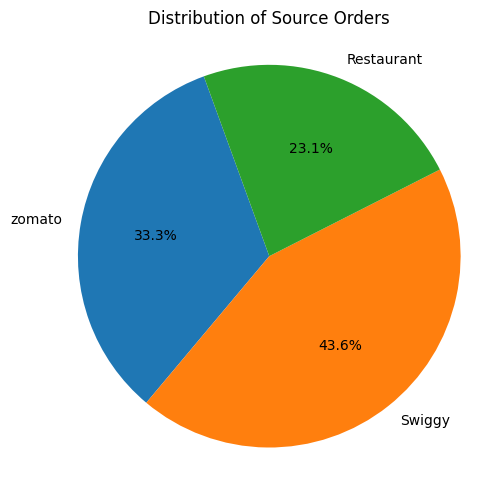

In [73]:
# Aggregate data by 'source_order'
agg_df = Sale_df.groupBy('source_order').count()

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = agg_df.toPandas()

# Plotting
plt.figure(figsize=(5, 5))
plt.pie(pandas_df['count'], labels=pandas_df['source_order'], autopct='%1.1f%%', startangle=110)
plt.title('Distribution of Source Orders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

**Menu DataFrame**

In [74]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType ,DateType

# Create a spark session using getOrCreate() function 
spark_session = SparkSession.builder.getOrCreate() 
  
# Define the structure for the data frame 
schema = StructType([ 
    StructField("Product_id",IntegerType(),True),
    StructField("Product_Name",StringType(),True),
    StructField("Prize",StringType(),True),
]) 
  
# Applying custom schema to data frame 
menu_df = spark_session.read.format( 
    "csv").schema(schema).option( 
    "header", False).load(r"B:\mdata\Download\menu.csv.txt") 
  
# Display the updated schema 
menu_df.printSchema() 

root
 |-- Product_id: integer (nullable = true)
 |-- Product_Name: string (nullable = true)
 |-- Prize: string (nullable = true)



In [75]:
menu_df.show()

+----------+------------+-----+
|Product_id|Product_Name|Prize|
+----------+------------+-----+
|         1|       PIZZA|  100|
|         2|     Chowmin|  150|
|         3|    sandwich|  120|
|         4|        Dosa|  110|
|         5|     Biryani|   80|
|         6|       Pasta|  180|
+----------+------------+-----+



**Total Amount Spend By Each Customer**

+-----------+----------+
|customer_id|sum(Prize)|
+-----------+----------+
|          A|    4260.0|
|          B|    4440.0|
|          C|    2400.0|
|          D|    1200.0|
|          E|    2040.0|
+-----------+----------+



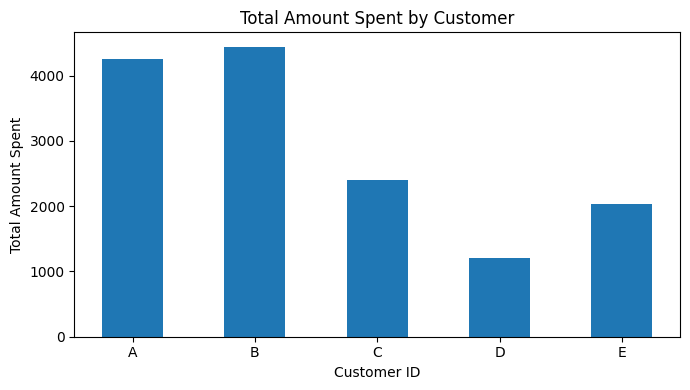

In [112]:
Total_amount_spent = (Sale_df.join(menu_df, 'Product_id').groupBy( 'customer_id').agg({'Prize': 'sum' }).orderBy('customer_id'))
Total_amount_spent.show()

# Assuming Sale_df is joined with menu_df and already exists

# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate data by 'customer_id' and calculate the sum of 'Prize'
total_amount_spent_df = Sale_df.join(menu_df, 'Product_id') \
    .groupBy('customer_id') \
    .agg({'Prize': 'sum'}) \
    .orderBy('customer_id')

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = total_amount_spent_df.toPandas()

# Plotting
plt.figure(figsize=(7, 4))
plt.bar(pandas_df['customer_id'], pandas_df['sum(Prize)'],width=0.5)
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Customer')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [77]:
Total_Spent_InFood = (Sale_df.join(menu_df, 'Product_id').groupBy( 'Product_Name').agg({'Prize': 'Sum' }).orderBy('Product_Name'))
Total_Spent_InFood.show()



+------------+----------+
|Product_Name|sum(Prize)|
+------------+----------+
|     Biryani|     480.0|
|     Chowmin|    3600.0|
|        Dosa|    1320.0|
|       PIZZA|    2100.0|
|       Pasta|    1080.0|
|    sandwich|    5760.0|
+------------+----------+



**Total Amount Spend By Each Food Categories**

+------------+----------+
|Product_Name|sum(Prize)|
+------------+----------+
|     Biryani|     480.0|
|     Chowmin|    3600.0|
|        Dosa|    1320.0|
|       PIZZA|    2100.0|
|       Pasta|    1080.0|
|    sandwich|    5760.0|
+------------+----------+



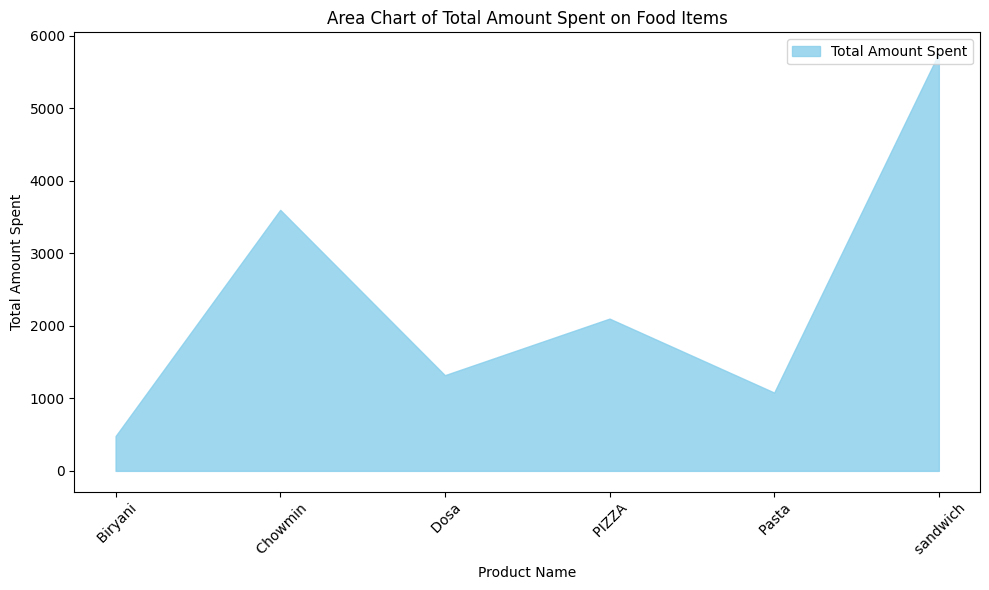

In [115]:
Total_Spent_InFood = (Sale_df.join(menu_df, 'Product_id').groupBy( 'Product_Name').agg({'Prize': 'Sum' }).orderBy('Product_Name'))
Total_Spent_InFood.show()
import matplotlib.pyplot as plt
import numpy as np

# Assuming Total_Spent_InFood DataFrame exists

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = Total_Spent_InFood.toPandas()

# Extract data
product_names = pandas_df['Product_Name']
total_spent = pandas_df['sum(Prize)']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the x-values for the area chart
x_values = np.arange(len(product_names))

# Plot the area chart
ax.fill_between(x_values, total_spent, color='skyblue', alpha=0.8, label='Total Amount Spent')

# Set x-axis ticks and labels
ax.set_xticks(x_values)
ax.set_xticklabels(product_names, rotation=45)

# Set labels and title
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Amount Spent')
ax.set_title('Area Chart of Total Amount Spent on Food Items')

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()



**Total Amount Of Sale Each Month**

In [78]:
Total_Spent_InMonth = (Sale_df.join(menu_df, 'Product_id').groupBy( 'order_Month').agg({'Prize': 'Sum' }).orderBy('order_Month'))
Total_Spent_InMonth.show()

+-----------+----------+
|order_Month|sum(Prize)|
+-----------+----------+
|          1|    2960.0|
|          2|    2730.0|
|          3|     910.0|
|          5|    2960.0|
|          6|    2960.0|
|          7|     910.0|
|         11|     910.0|
+-----------+----------+



**Yearly Sale**

In [79]:
Total_Spent_InYear = (Sale_df.join(menu_df, 'Product_id').groupBy( 'order_year').agg({'Prize': 'Sum' }).orderBy('order_year'))
Total_Spent_InYear.show()

+----------+----------+
|order_year|sum(Prize)|
+----------+----------+
|      2022|    4350.0|
|      2023|    9990.0|
+----------+----------+



**Quaterly Sales**

In [80]:
Total_Spent_InQuarter = (Sale_df.join(menu_df, 'Product_id').groupBy( 'order_Quarter').agg({'Prize': 'Sum' }).orderBy('order_Quarter'))
Total_Spent_InQuarter.show()

+-------------+----------+
|order_Quarter|sum(Prize)|
+-------------+----------+
|            1|    6600.0|
|            2|    5920.0|
|            3|     910.0|
|            4|     910.0|
+-------------+----------+



**Visualization**

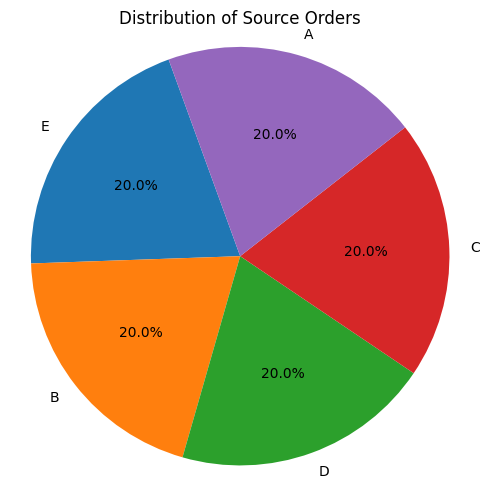

In [82]:
# Aggregate data by 'source_order'
agg_df = Total_amount_spent.groupBy('customer_id').count()

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = agg_df.toPandas()

# Plotting
plt.figure(figsize=(5, 5))
plt.pie(pandas_df['count'], labels=pandas_df['customer_id'], autopct='%1.1f%%', startangle=110)
plt.title('Distribution of Source Orders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()